# Iris Flowers Classification ML Project

### Importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Uploading dataset

In [3]:
data=pd.read_csv(r"C:\Users\Narayanason\Downloads\archive\IRIS.csv")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Data Information

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Data Description 

In [5]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Exploratory Data Analysis

### Null values count

In [6]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

### Boxplot

<AxesSubplot:>

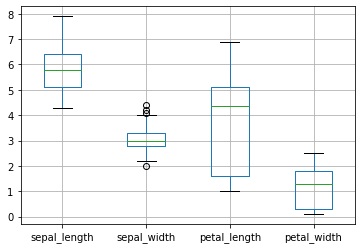

In [7]:
data.boxplot()

### Outlier Analysis 

In [8]:
def remove_outliers(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range

In [9]:
lower_e,upper_e=remove_outliers(data['sepal_width'])
data['sepal_width']=np.where(data['sepal_width']>upper_e,upper_e,data['sepal_width'])
data['sepal_width']=np.where(data['sepal_width']<lower_e,lower_e,data['sepal_width'])

### Boxplot after removing outliers 

<AxesSubplot:>

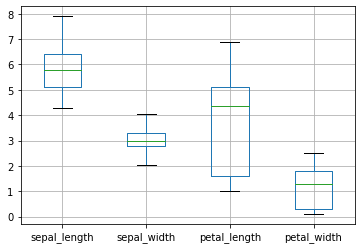

In [10]:
data.boxplot()

### Scatter Matrix

<function matplotlib.pyplot.show(close=None, block=None)>

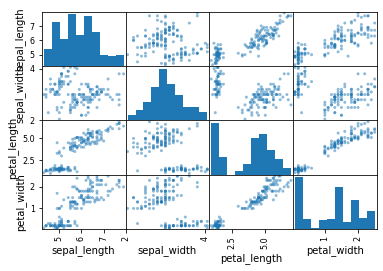

In [11]:
from pandas.plotting import scatter_matrix
scatter_matrix(data)
plt.show

### Data Correlation

In [12]:
data.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.110343,0.871754,0.817954
sepal_width,-0.110343,1.000000,-0.419823,-0.355582
petal_length,0.871754,-0.419823,1.000000,0.962757
petal_width,0.817954,-0.355582,0.962757,1.000000


### splitting X and Y variables

In [13]:
feature_cols=["sepal_length","sepal_width","petal_length","petal_width"]
X=data[feature_cols]
Y=data.species

### Splitting Training and Testing Data

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.80,test_size=0.20,random_state=100)

### Fitting a Logistic Regression Model

In [22]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train, y_train)

C:\Users\Narayanason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Predicting Values

In [23]:
y_pred=classifier.predict(x_test)

###  Confusion Matrix

In [24]:
from sklearn import metrics
cnf_matrix=metrics.confusion_matrix(y_test,y_pred)
cnf_matrix

array([[11,  0,  0],
       [ 0,  5,  1],
       [ 0,  0, 13]], dtype=int64)

### Accuracy Score

In [25]:
print("accuracy:",metrics.accuracy_score(y_test,y_pred))

accuracy: 0.9666666666666667
